<a href="https://colab.research.google.com/github/hrs9616/Misc.-scripts/blob/main/CN%2B_GRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='font-size:large'>GRM Analysis for CN\+</span>



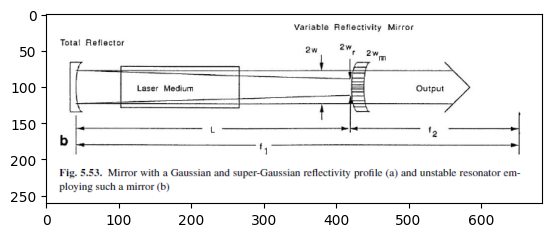

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops

# From Koechner, sec. 5.5
img1 = Image.open(r"/content/drive/MyDrive/Colab Notebooks/GRMs/GRMs.png")
plt.imshow(img1)

In [204]:
# NdYAG properties

# wavelength
wavelength = 1064 *10**(-9)

# index, 1% at.wt.
nYAG = 1.8197

# length of slab
l = 42                   # millimeters
s = 3.5

In [205]:
# CN+ stable resonator properties

# resonator length
L = 321.25               # millimeters

# R1 refers to OC, R2 refers to HR

# Stable OC reflectivity
R1_stable = 0.3
# HR reflectivity
R2 = 1

# M2 for stable cavity
M2 = 19

# From Koechner, p. 104
g0 = -(1 / (2 * l)) * np.log(R1_stable * R2)
print("g0L = ", g0 * L)


g0L =  4.60447932606794


In [206]:
# GRM Eqns. from Koechner, sec. 5.5

# Magnification
m = np.sqrt(1 + (w / wM)**2)
print("m = ", m)

# Output coupler reflectivity (Koechner, p. 285)
R1 = 1 / m**2

# OC ROC
R1_ROC = -2 * L / (m-1)
# HR ROC
R2_ROC = -m * R1_ROC

# For confocal resonator, verify resonator stability eqn.

print("Resonator stability for confocal cavity: 2L = R1_ROC + R2_ROC")
print("R1_ROC + R2_ROC = ", "%.4G" % (R1_ROC + R2_ROC))
print("2L = ", 2*L)

# Rod thermal lens is approx. 1m (from Kris Goldizen worksheet).

m =  1.256551827532037
Resonator stability for confocal cavity: 2L = R1_ROC + R2_ROC
R1_ROC + R2_ROC =  642.5
2L =  642.5


In [207]:
# Design procedure from Koechner, p. 292

print("Calculated parameters from Koechner Design Procedure, p. 292:")
# From Ropt for stable cavity
m = 1 / (R1_stable)**(1/4)
print("m = ", m)

# Spot size radius of Gaussian beam
w = 0.5 * (s /2)

# Calculated GRM spot size
wM_calc = w / np.sqrt(m**2 - 1)
print("wM_calc = ", wM_calc)

# Calculated GRM maximum reflectivity
Rmax = 1 / m**2
print("Rmax = ", Rmax)

# Calculated GRM effective reflectivity
Reff_calc = Rmax / m**2
print("Reff_calc = ", Reff_calc)
print("")

# Using design procedure calculations
# Calculated OC ROC
R1_ROC_calc = -2 * L / (m-1)
# HR ROC
R2_ROC_calc = -m * R1_ROC
print("Calculated mirror radii of curvatures:")
print("R1_ROC_calc = ", R1_ROC_calc, "mm")
print("R2_ROC_calc = ", R2_ROC_calc, "mm")

# Mirror focal lengths
f1 = -R1_ROC_calc / 2
f2 = f1 + L
print("Mirror focal lengths:")
print("f1 = ", f1, "mm")
print("f2 = ", f2, "mm")
print("")

# GRM effective reflectivity
Reff = Rmax / m**2
print("GRM effective reflectivity")
print("Reff = ", Reff)
print("")

# Rod thermal lens
f_calc = 1 / ((1 / R2_ROC_calc) - (1 / Reff))
print("Thermal lens, f_calc = ", f_calc)


Calculated parameters from Koechner Design Procedure, p. 292:
m =  1.3512001548070345
wM_calc =  0.9629104565177777
Rmax =  0.5477225575051661
Reff_calc =  0.29999999999999993

Calculated mirror radii of curvatures:
R1_ROC_calc =  -1829.441107032026 mm
R2_ROC_calc =  3383.9014432867734 mm
Mirror focal lengths:
f1 =  914.720553516013 mm
f2 =  1235.9705535160128 mm

GRM effective reflectivity
Reff =  0.29999999999999993

Thermal lens, f_calc =  -0.3000265988774116


In [208]:
# GRM specs

# PN Custom GRM
R0 = 0.4
wM = 1.15                 # millimeters
N = 6
R2_ROC_GRM = 1000         # millimeters

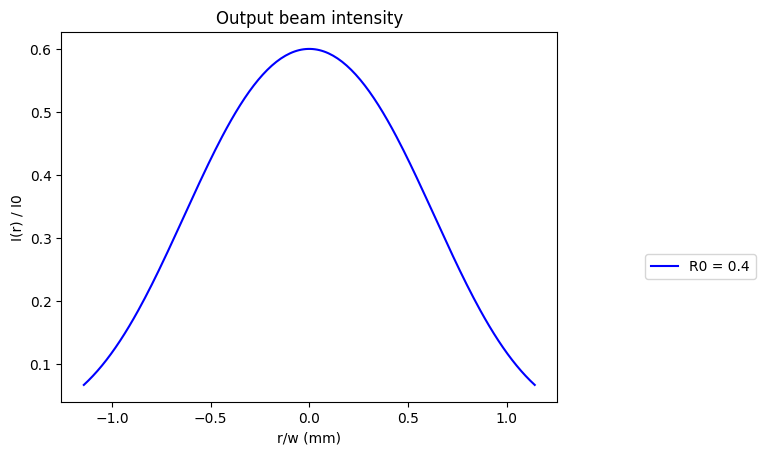

In [209]:
# Output intensity
I0 = 1
r = np.linspace(-1, 1, 200)
Iout = (1 - R0 * np.exp(-2*(r/wM)**2))  * I0 * np.exp(-2*(r/w)**2)

#plot beam intensity profile
plt.xlabel("r/w (mm)")
plt.ylabel("I(r) / I0")
#plt.grid()
plt.plot(r/w, Iout/I0, label='R0 = 0.4', color='blue', linestyle='-')
plt.title("Output beam intensity")
plt.legend(bbox_to_anchor=(1.4, 0.4), borderaxespad=0)
plt.show()